# The CSGo Snapshot data

### Problem Statement
* The objective of this project is to build and compare multiple ML Algorithms for the classification of round winners in the game CS:Go

### Overview of CSGo terms
* CSGo is a tactical shooter, where two teams the Counter-Terrorists (CT) and the Terrorists (T) play for a best of 30s seconds with each round being 1.9 minutes.
- There are 5 players on each team (10 in total) and the first to reach 16 rounds wins the game. 
* At the start, one team plays as the CTs and the other as the Ts. After 15 rounds are played, the teams swap sides
- There are 7 different maps a game can be played on. 
* You win a round as terrorist by either planting a bomb and making sure that it explodes, or by eliminating the other team.
- You win a round as a Counter-terrorist by either eliminating the other team , or disarming the bomb should it be planted

## The dataset
-  There are 122,410 records with 97 attributes. 

* **time_left**: The time left in the current round 
    * $\in[0.01,175]$

- **ct_score**: the current score of the CT team 
    - $\in[0,32]$
* **t_score**: the current score of the T team 
    * $\in[0,33]$
- **map**: The map the round is played on
    - $\in$`['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache']`
* **bomb_planted**: If the bomb has been planted or not
    * $\in$`[False,  True]`

- **ct_health**: The total health of all CT players
    - $\in[0,500]$
    
* **t_health**: The total health of all T players
    * $\in[0,600]$
- **ct_armor**: The total armor of all CT players
    - $\in[0,500]$
* **t_armor**: The total armor of all T players
    * $\in[0,500]$
- **ct_money**: The total bankroll of all CT players
    - $\in[0,80000]$
* **t_money**: The total bankroll of all T players
    * $\in[0,80000]$
- **ct_helmets**: Number of helmets on the CT team
    - $\in[0,5]$
* **t_helments**: Number of helmets on the T team
    * $\in[0,5]$
- **ct_defuse_kits**: Number of defuse kits on the CT team
    - $\in[0,5]$
* **ct_players_alive**: Number of players alive on the CT team
    * $\in[0,5]$
- **t_players_alive**: Number of players on T team
    - $\in[0,6]$
 
* **ct_weapon_x**: number of weapon 'x' on the T team
    * x$\in$`['ak47','aug','awp','bizon','cz75auto','elite','famas','g3sg1','galilar','glock','m249','m4a1s',
              'm4a4','mac10','mag7','mp5sd','mp7','mp9','negev','nova','p90','r8revolver','sawedoff','scar20',
              'sg553','ssg08','ump45','xm1014','deagle','fiveseven','usps','p250','p2000','tec9']`

- **t_weapon_x**: number of weapon 'x' on the CT team
    - x$\in$`['ak47','aug','awp','bizon','cz75auto','elite','famas','g3sg1','galilar','glock','m249','m4a1s',
              'm4a4','mac10','mag7','mp5sd','mp7','mp9','negev','nova','p90','r8revolver','sawedoff','scar20',
              'sg553','ssg08','ump45','xm1014','deagle','fiveseven','usps','p250','p2000','tec9']`
* **ct_grenade_x**: number of grenade 'x' on the CT team
    * x$\in$`['hegrenade','flashbang','smokegrenade','incendiarygrenade','molotovgrenade','decoygrenade']`
    
- **t_grenade_x**: number of grenade 'x' on the T team
    - x$\in$`['hegrenade','flashbang','smokegrenade','incendiarygrenade','molotovgrenade','decoygrenade']`
    
* **round_winner**: winner of the round
    * $\in$`['CT', 'T']`

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.compose import ColumnTransformer,make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score,classification_report

In [80]:
cs = pd.read_csv('../data/csgo_round_snapshots.csv')
cs.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [3]:
# using a regex to extract the gun and grenade types

x = re.findall('\sct_grenade_([a-z0-9]*)\s',' '.join(cs.columns.values)) #to extract the grenade names
#\sct_weapon_([a-z0-9]*)\s - regex for weapons

## EDA

In [101]:
# deciding the type of the columns

#float
numf = ['time_left','ct_score','t_score','ct_health','t_health','ct_armor','ct_money','t_armor','t_money']

#integer
numi = cs.iloc[:,11:-1].columns
cs[numi] =cs[numi].astype('int32')

#bool
cs['bomb_planted'] = cs['bomb_planted'].astype('int8')

#categorical
cs[['map','round_winner']]=cs[['map','round_winner']].astype('category')
categoric = ['map']

#target
target = ['round_winner']

In [102]:
# cs.shape #(122410, 97)

cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   time_left                     122410 non-null  float64 
 1   ct_score                      122410 non-null  float64 
 2   t_score                       122410 non-null  float64 
 3   map                           122410 non-null  category
 4   bomb_planted                  122410 non-null  int8    
 5   ct_health                     122410 non-null  float64 
 6   t_health                      122410 non-null  float64 
 7   ct_armor                      122410 non-null  float64 
 8   t_armor                       122410 non-null  float64 
 9   ct_money                      122410 non-null  float64 
 10  t_money                       122410 non-null  float64 
 11  ct_helmets                    122410 non-null  int32   
 12  t_helmets                     

In [9]:
# the descriptive stats for the non-weapon/grenade columns
cs[list(filter(lambda x: re.match('(?!c?t_(weapon|grenade)_[a-z0-9]*)',x),cs.columns.values))].describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,2.773638,1.613724,4.273752,4.266187
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,2.010915,1.605780,1.205500,1.228325
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,0.000000,0.000000,4.000000,4.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,3.000000,1.000000,5.000000,5.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,5.000000,3.000000,5.000000,5.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,5.000000,5.000000,5.000000,6.000000


In [243]:
# the descriptive stats only for the weapon and grenade columns
cs[list(filter(lambda x: re.match('(c?t_(weapon|grenade)_[a-z0-9]*)',x),cs.columns.values))].describe()

,ct_weapon_ak47,t_weapon_ak47,ct_weapon_aug,t_weapon_aug,ct_weapon_awp,t_weapon_awp,ct_weapon_bizon,t_weapon_bizon,ct_weapon_cz75auto,t_weapon_cz75auto,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.0,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,0.274602,1.243926,0.134613,0.007638,0.573695,0.321191,0.0,0.000082,0.151989,0.106053,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,0.584092,1.363887,0.460303,0.091456,0.673249,0.476667,0.0,0.009038,0.445910,0.379993,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,4.000000,5.000000,5.000000,3.000000,5.000000,4.000000,0.0,1.000000,5.000000,6.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [244]:
# the descriptive stats of the object columns
cs.describe(include='object')

,map,round_winner
count,122410,122410
unique,8,2
top,de_inferno,T
freq,23811,62406


In [245]:
# checking for nulls
cs.isnull().sum().sum()

0

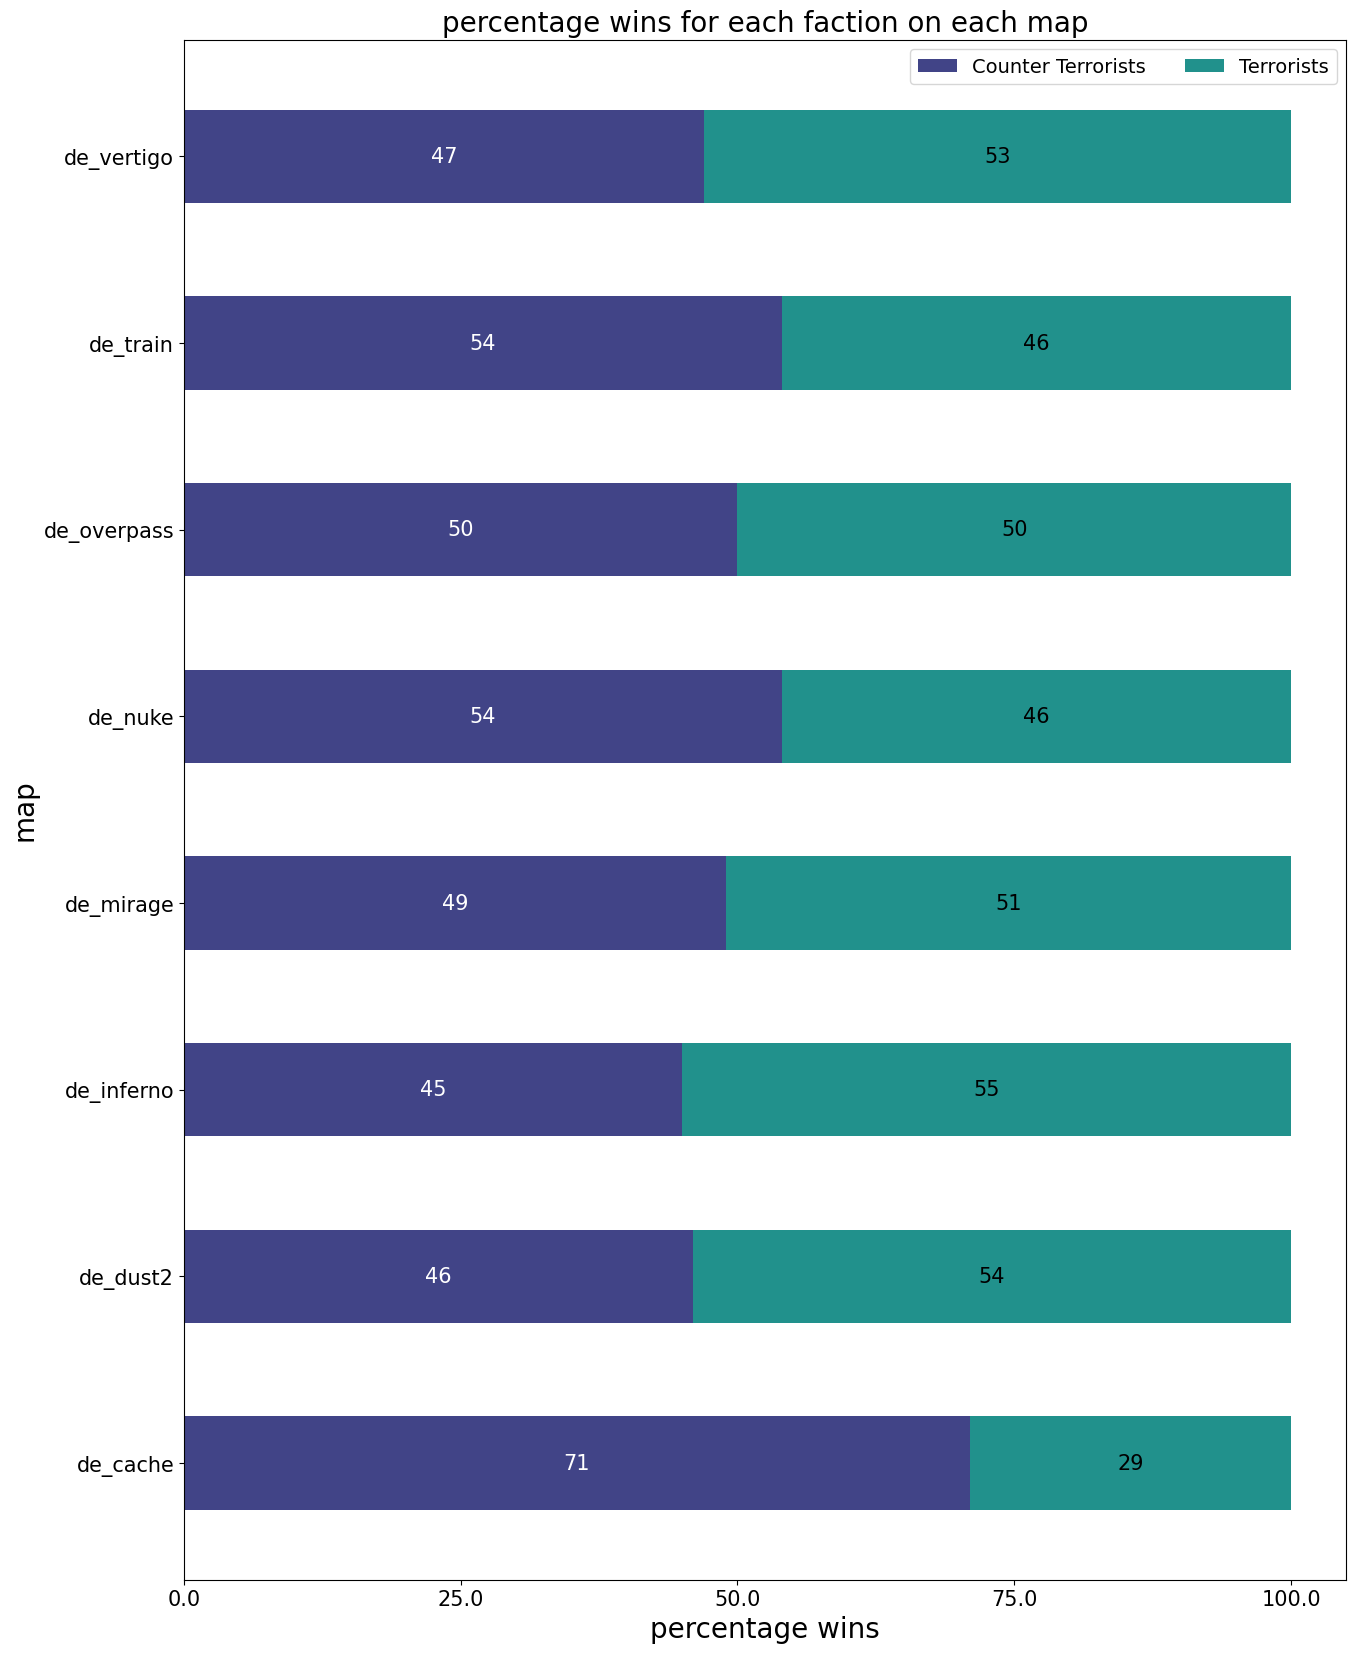

In [246]:
# checking the win ratio using horizontal bars

mapwin = pd.crosstab(index=cs['map'],columns=cs['round_winner'])
cmap = mpl.colormaps['viridis'](np.linspace(.2,.5,2))

fig,ax = plt.subplots(figsize=(15,20))
                      
for i,col in enumerate(mapwin.index):
    dtemp = np.around(mapwin.iloc[i,:].values/np.sum(mapwin.iloc[i,:].values),2)*100
    rects1 = ax.barh(y=i,left=0,width=dtemp[0],height=.5,color=cmap[0])
    rects2 = ax.barh(y=i,left=dtemp[0],width=dtemp[1],height=.5,color=cmap[1])
    
    ax.bar_label(rects1, label_type='center', color='w',fontsize=15)
    ax.bar_label(rects2,label_type='center',color='k',fontsize=15)
    
ax.legend([rects1[0],rects2[0]],['Counter Terrorists','Terrorists'],ncols=len(mapwin.index),loc='best',fontsize=14)
ax.set_xticks(np.linspace(0,100,5))
ax.set_xticklabels(np.linspace(0,100,5),fontsize=15)
ax.set_yticks(np.arange(0,8))
ax.set_yticklabels(mapwin.index,fontsize=15)

ax.set_xlabel('percentage wins',fontsize=20)
ax.set_ylabel('map',fontsize=20)
ax.set_title('percentage wins for each faction on each map',fontsize=20)

plt.show()

## Feature Engineering

converting categorical features into an integers column

In [106]:
# creating the transformation pipeline
numf_transformer = Pipeline(
    steps = [
        ('scaler',StandardScaler())
    ]
)

cat_transformer = Pipeline(
    steps = [
        ('encoder',OneHotEncoder(handle_unknown='ignore'))
    ]
)

numi_transformer = Pipeline(
    steps = [
        ('minmax',MinMaxScaler(feature_range=(0,1)))
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ('numf_transformer',numf_transformer,selector(dtype_include='float64')),
        ('numi_transformer',numi_transformer,selector(dtype_include='int32')),
        ('cat_transformer',cat_transformer,selector(dtype_include='category')),
    ],
    remainder='passthrough'
)


In [96]:
# creating the X, y datasets

X = cs.drop(columns='round_winner')
y = cs['round_winner']

In [205]:
# splitting the data after passing it throught the preprocessing pipeline
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=69)

In [206]:
# the preprocessing
labencoder = LabelEncoder()
y_train = labencoder.fit_transform(y_train)
y_test = labencoder.transform(y_test)

# the features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## reducing features

In [171]:
lda = LinearDiscriminantAnalysis()

#fitting the training data
lda.fit(X_train,y_train)

#transforming the test data
lda.transform(X_test)

array([[-0.29676329],
       [-1.1667233 ],
       [-1.09612966],
       ...,
       [-1.10313183],
       [ 1.31352885],
       [-0.99323647]])

In [179]:
lda_var = np.exp(np.abs(lda.explained_variance_ratio_))
lda_var= lda_coeff.flatten()

order_var = np.argsort(lda_var)[::-1]

In [180]:
# creating an array of feature names
cols = cs.drop(columns=['map','round_winner']).columns.tolist()+cs['map'].cat.categories.tolist()
cols[:] = [cols[i] for i in order_coeff]

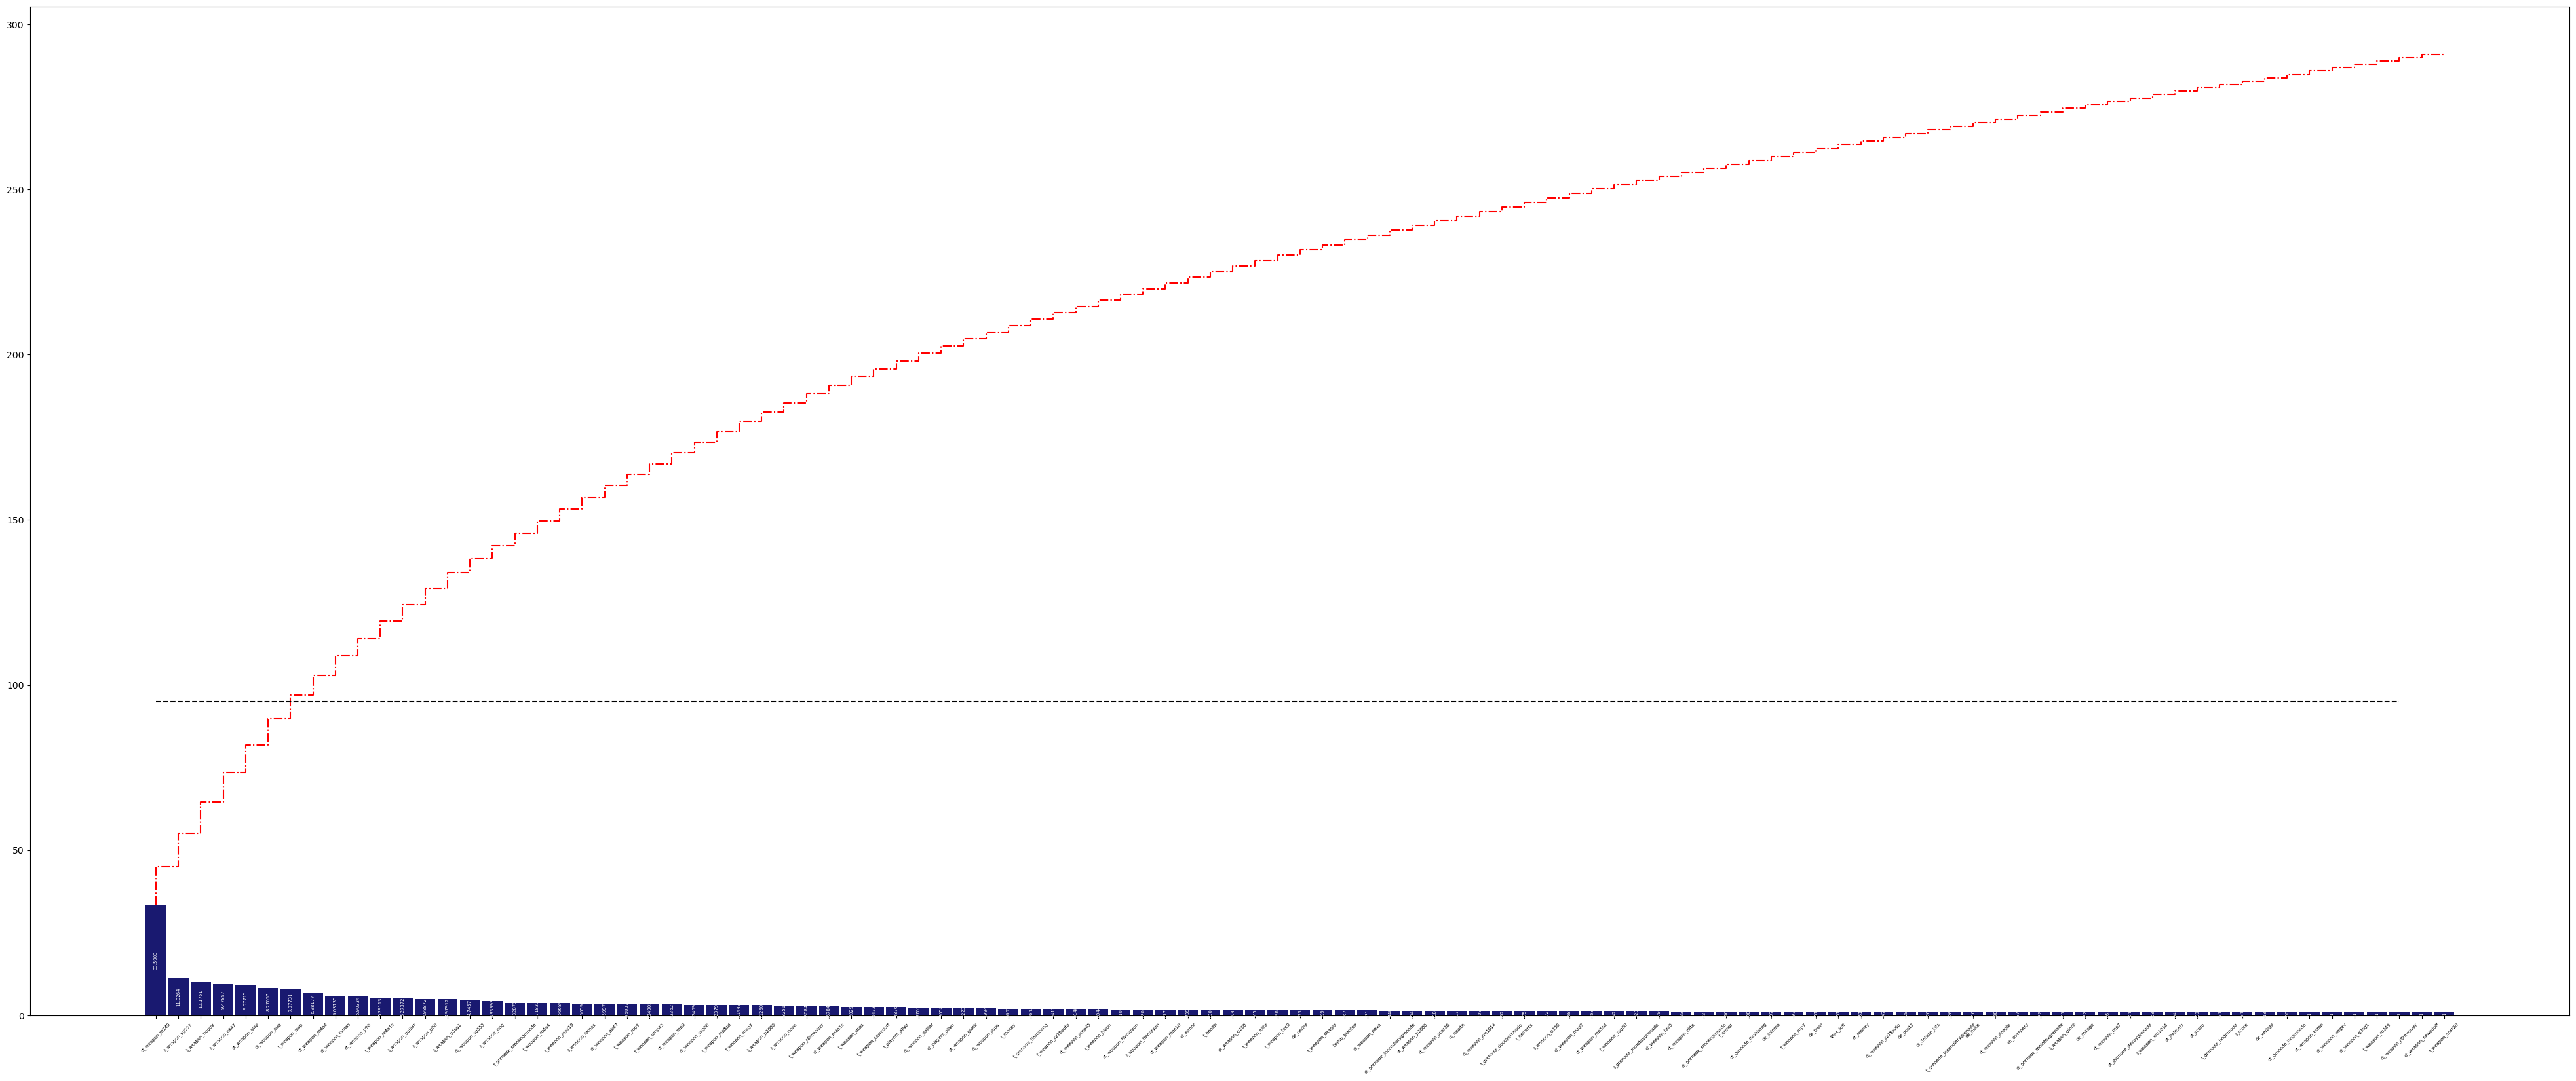

In [181]:
# a scree plot

fig, ax = plt.subplots(figsize=(50,20))
rects = ax.bar(x=np.arange(0,len(cols)),height = np.sort(lda_var)[::-1],width=.9,color='midnightblue')
ax.bar_label(rects,label_type='center',color='w',fontsize=5,rotation=90)

ax.set_xticks(np.arange(0,len(cols)))
ax.set_xticklabels(cols,rotation=45,fontsize=5)

cumcols = np.cumsum(np.sort(lda_var)[::-1])
ax.step(x=np.arange(0,len(cols)),y=cumcols,ls='-.',c='r')

ax.plot((0,100),(95,95),ls='--',c='k')

plt.show()

In [207]:
# we will use the top 20 columns for Machine Learning
X_train= X_train[:,np.r_[order_var[:50]]]
X_test = X_test[:,np.r_[order_var[:50]]]

## The Model

In [208]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

LogisticRegression()

In [209]:
y_pred = lr.predict(X_test)

print(f'The accuracy score of this model is: {accuracy_score(y_test,y_pred)}')

The accuracy score of this model is: 0.7447103994771669


In [210]:
# the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74     11945
           1       0.76      0.74      0.75     12537

    accuracy                           0.74     24482
   macro avg       0.74      0.74      0.74     24482
weighted avg       0.75      0.74      0.74     24482



#### Decision Tree and RF

In [211]:
rfc = RandomForestClassifier(n_estimators=300)

rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [212]:
# on the test data
y_pred = rfc.predict(X_test)

print(f'The accuracy score of the RFC is {accuracy_score(y_test,y_pred)}')

The accuracy score of the RFC is 0.8469079323584674


In [213]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [214]:
# on the test data
y_pred = dtc.predict(X_test)

print(f'The accuracy score for the DTC is {accuracy_score(y_test,y_pred)}')

The accuracy score for the DTC is 0.7971570950085777
